In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#lecture des donnees
data=pd.read_csv('data.csv')

In [3]:
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [4]:
#supression des colonnes non utilisees
data=data.drop(['tension_strenght','elongation'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 4.0+ KB


C:\Users\Abdelhak\AppData\Local\Temp\ipykernel_10656\1787067972.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corr()


<Axes: >

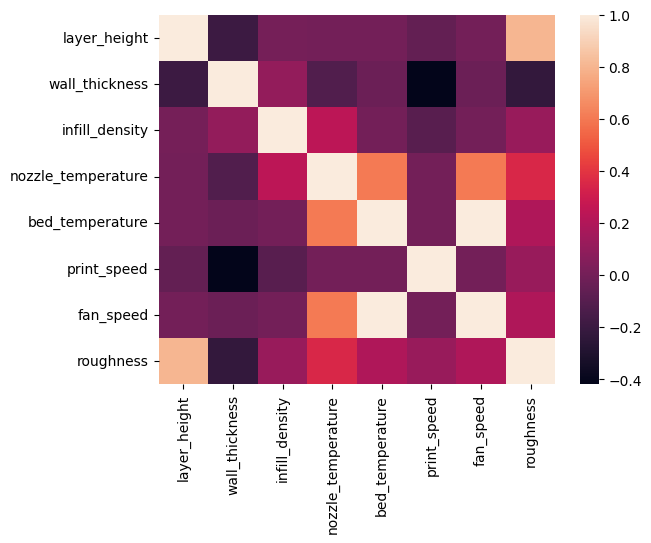

In [6]:
#correlation entre les colonnes
correlation=data.corr()
sn.heatmap(correlation)

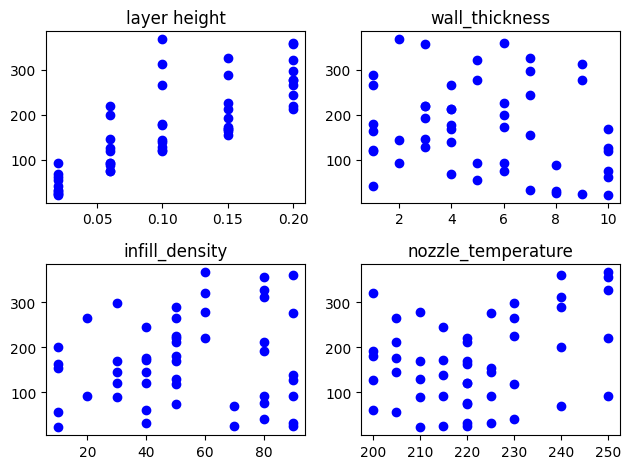

In [7]:
plt.figure()
plt.subplot(2,2,1)
plt.scatter(data['layer_height'],data['roughness'],color='blue')
plt.title('layer height')

plt.subplot(2,2,2)
plt.scatter(data['wall_thickness'],data['roughness'],color='blue')
plt.title('wall_thickness')

plt.subplot(2,2,3)
plt.scatter(data['infill_density'],data['roughness'],color='blue')
plt.title('infill_density')

plt.subplot(2,2,4)
plt.scatter(data['nozzle_temperature'],data['roughness'],color='blue')
plt.title('nozzle_temperature')

# Customize layout spacing
plt.tight_layout()

# Show the plots
plt.show()

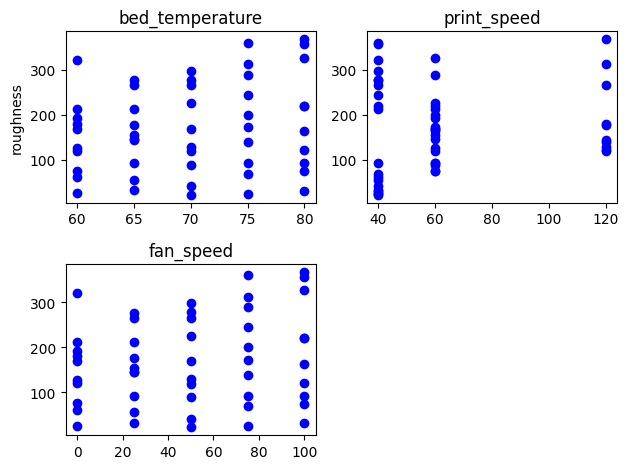

In [8]:
plt.figure()
plt.subplot(2,2,1)
plt.scatter(data['bed_temperature'],data['roughness'],color='blue')
plt.ylabel('roughness')
plt.title('bed_temperature')

plt.subplot(2,2,2)
plt.scatter(data['print_speed'],data['roughness'],color='blue')
plt.title('print_speed')

plt.subplot(2,2,3)
plt.scatter(data['fan_speed'],data['roughness'],color='blue')
plt.title('fan_speed')


# Customize layout spacing
plt.tight_layout()

# Show the plots
plt.show()

In [9]:
#one hot encoding des colonnes avec des categories
infill_data = pd.get_dummies(data['infill_pattern'])
material_data = pd.get_dummies(data['material'])

In [10]:
infill_data.head()

,grid,honeycomb
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [11]:
material_data.head()

,abs,pla
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [12]:
data=data.drop(['infill_pattern','material'],axis=1)
data.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness
0,0.02,8,90,220,60,40,0,25
1,0.02,7,90,225,65,40,25,32
2,0.02,1,80,230,70,40,50,40
3,0.02,4,70,240,75,40,75,68
4,0.02,6,90,250,80,40,100,92


In [13]:
data.insert(2, "abs", material_data['abs'], True)
data.insert(3, "pla", material_data['pla'], True)
data.insert(4, "grid", infill_data['grid'], True)
data.insert(5, "honeycomb", infill_data['honeycomb'], True)
data.head()

,layer_height,wall_thickness,abs,pla,grid,honeycomb,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness
0,0.02,8,1,0,1,0,90,220,60,40,0,25
1,0.02,7,1,0,0,1,90,225,65,40,25,32
2,0.02,1,1,0,1,0,80,230,70,40,50,40
3,0.02,4,1,0,0,1,70,240,75,40,75,68
4,0.02,6,1,0,1,0,90,250,80,40,100,92


In [14]:
x=data.drop(['roughness'],axis=1)
y=data['roughness']

In [15]:
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [18]:
y_pred=model.predict(x_test)

In [20]:
print(f"Training R2 score : {r2_score(y_train, model.predict(x_train))}\t Test R2 score : {r2_score(y_test, y_pred)} ")
print(f"Training mean absolute error : {mean_absolute_error(y_train, model.predict(x_train))} \t Test mean absolute error : {mean_absolute_error(y_test, y_pred)}")

Training R2 score : 0.8813635915864824	 Test R2 score : 0.7891419217479535 
Training mean absolute error : 29.26998145884708 	 Test mean absolute error : 23.07361623758547


In [21]:
columns=x.columns.tolist()

['layer_height',
 'wall_thickness',
 'abs',
 'pla',
 'grid',
 'honeycomb',
 'infill_density',
 'nozzle_temperature',
 'bed_temperature',
 'print_speed',
 'fan_speed']

In [37]:
x_train2=x_train
x_train2=pd.DataFrame(x_train2)
x_train2.columns = columns

x_test2=x_test
x_test2=pd.DataFrame(x_test2)
x_test2.columns = columns


In [38]:
#supression des colonnes non correlees avec la rugosite
x_train2=x_train2.drop(['wall_thickness','fan_speed','infill_density'],axis=1)
x_test2=x_test2.drop(['wall_thickness','fan_speed','infill_density'],axis=1)

In [39]:
model2 = LinearRegression()

model2.fit(x_train2, y_train)

LinearRegression()

In [40]:
y_pred2=model2.predict(x_test2)

In [41]:
print(f"Training R2 score : {r2_score(y_train, model2.predict(x_train2))}\t Test R2 score : {r2_score(y_test, y_pred2)} ")
print(f"Training mean absolute error : {mean_absolute_error(y_train, model2.predict(x_train2))} \t Test mean absolute error : {mean_absolute_error(y_test, y_pred2)}")

Training R2 score : 0.8779312155089993	 Test R2 score : 0.7911877551417732 
Training mean absolute error : 29.365309029448106 	 Test mean absolute error : 21.9909276725706


In [43]:
#utilisation des polynomes avec ordre superieure
model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

# Fit the pipeline to the data
model_poly.fit(x_train2, y_train)


pred_poly = model_poly.predict(x_test2)

print(f"Training R2 score : {r2_score(y_train, model_poly.predict(x_train2))}\t Test R2 score : {r2_score(y_test, pred_poly)} ")
print(f"Training mean absolute error : {mean_absolute_error(y_train, model_poly.predict(x_train2))} \t Test mean absolute error : {mean_absolute_error(y_test, pred_poly)}")

Training R2 score : 0.981792328530372	 Test R2 score : 0.7921232848372614 
Training mean absolute error : 11.96057631221729 	 Test mean absolute error : 21.019887510393694
